In [ ]:
# install datasets
!pip install datasets
#!pip install transformers

import pandas as pd
import numpy as np
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric
# Downloading and loading a dataset
dataset = load_dataset('ag_news')

In [3]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, make_scorer
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import StratifiedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
import pickle
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [4]:
# Set seed
from numpy.random import seed
seed(123)

import os
os.environ['PYTHONHASHSEED']=str(123) 

import random
random.seed(123)

#import tensorflow as tf
tf.random.set_seed(123)

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

In [6]:
train_data = pd.DataFrame(dataset["train"])
test_data = pd.DataFrame(dataset['test'])
#train_data["tag"] = 'train'
#test_data["tag"] = 'test'
 
print(train_data.shape, test_data.shape)

(120000, 2) (7600, 2)


**Label Details** 
*   0 - World
*   1 - Sports
*   2 - Business
*   3 - Sci/Tech


In [130]:
total_data = pd.concat([train_data, test_data])
print(total_data.shape)
total_data.tail()
total_data = total_data["text"]

(127600, 3)


In [8]:
train_data.head(20)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
5,"Stocks End Up, But Near Year Lows (Reuters) Re...",2
6,Money Funds Fell in Latest Week (AP) AP - Asse...,2
7,Fed minutes show dissent over inflation (USATO...,2
8,Safety Net (Forbes.com) Forbes.com - After ear...,2
9,Wall St. Bears Claw Back Into the Black NEW Y...,2


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [9]:
print(train_data.label.value_counts())
print(test_data.label.value_counts())

2    30000
3    30000
1    30000
0    30000
Name: label, dtype: int64
2    1900
3    1900
1    1900
0    1900
Name: label, dtype: int64


In [10]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [127]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

maximum >> 1012
minimum >> 100
average >> 236.477525
median >> 232.0



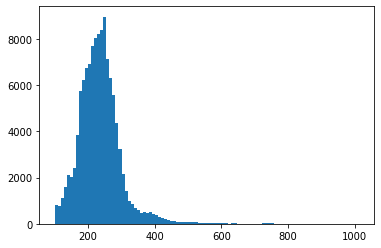

In [128]:
print(f"maximum >> {np.max([len(s)for s in X_train])}")
print(f"minimum >> {np.min([len(s)for s in X_train])}")
print(f"average >> {np.mean([len(s)for s in X_train])}")
print(f"median >> {np.median([len(s)for s in X_train])}\n")

lens = [len(s) for s in X_train]
plt.hist(lens,bins=100)
plt.show()

In [14]:
#total_data.values

In [129]:
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1, stratify=y_train)

In [14]:
type(X_training)

pandas.core.series.Series

In [131]:
vocab_size = 20000 # arbitrarily chosen
embed_size = 100 # arbitrarily chosen
maxlen = total_data.map(lambda x: len(x.split())).max()

# Create and Fit tokenizer
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(total_data.values)

# Tokenize data
X_training = tok.texts_to_sequences(X_training)
X_test = tok.texts_to_sequences(X_test)
X_val = tok.texts_to_sequences(X_val)

# Pad data
X_training = pad_sequences(X_training, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [132]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D()) #Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(Dense(1024))
model.add(Dropout(0.25)) #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax')) #softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 177, 100)          2000000   
                                                                 
 bidirectional_16 (Bidirecti  (None, 177, 256)         234496    
 onal)                                                           
                                                                 
 bidirectional_17 (Bidirecti  (None, 177, 128)         164352    
 onal)                                                           
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_40 (Dense)            (None, 1024)              132096    
                                                      

In [133]:
callbacks = [
    EarlyStopping(     #EarlyStopping is used to stop at the epoch where val_accuracy does not improve significantly
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=4,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )]

In [134]:
#Compile and Fit Model

model.compile(loss='sparse_categorical_crossentropy', #Sparse Categorical Crossentropy Loss because data is not one-hot encoded
              optimizer='adam', 
              metrics=['accuracy']) 

model.fit(X_training, 
          y_training, 
          batch_size=32, 
          validation_data=(X_val, y_val),  
          epochs=20, 
          callbacks=callbacks)

Epoch 1/20
3188/3188 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.8840
Epoch 1: val_accuracy improved from -inf to 0.91233, saving model to weights.h5
3188/3188 [==============================] - 120s 36ms/step - loss: 0.3494 - accuracy: 0.8840 - val_loss: 0.2661 - val_accuracy: 0.9123
Epoch 2/20
3187/3188 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9309
Epoch 2: val_accuracy improved from 0.91233 to 0.91878, saving model to weights.h5
3188/3188 [==============================] - 112s 35ms/step - loss: 0.2183 - accuracy: 0.9309 - val_loss: 0.2508 - val_accuracy: 0.9188
Epoch 3/20
3187/3188 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9475
Epoch 3: val_accuracy improved from 0.91878 to 0.91900, saving model to weights.h5
3188/3188 [==============================] - 112s 35ms/step - loss: 0.1604 - accuracy: 0.9475 - val_loss: 0.2815 - val_accuracy: 0.9190
Epoch 4/20
3187/3188 [============================>.

In [19]:
model.load_weights('weights.h5')
model.save('lstm_model.hdf5')

In [20]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
def modelDemo(news_text):

  #News Labels
  labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']

  test_seq = pad_sequences(tok.texts_to_sequences(news_text), maxlen=maxlen)

  test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]

  for news, label in zip(news_text, test_preds):
      # print('{} - {}'.format(news, label))
      print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))

In [22]:
modelDemo(['New evidence of virus risks from wildlife trade'])

New evidence of virus risks from wildlife trade - Science-Technology News


In [49]:
modelDemo(['Blockchain technology is very important in the expansion of decentralised finance'])

Blockchain technology is very important in the expansion of decentralised finance - Science-Technology News


<Figure size 432x288 with 0 Axes>

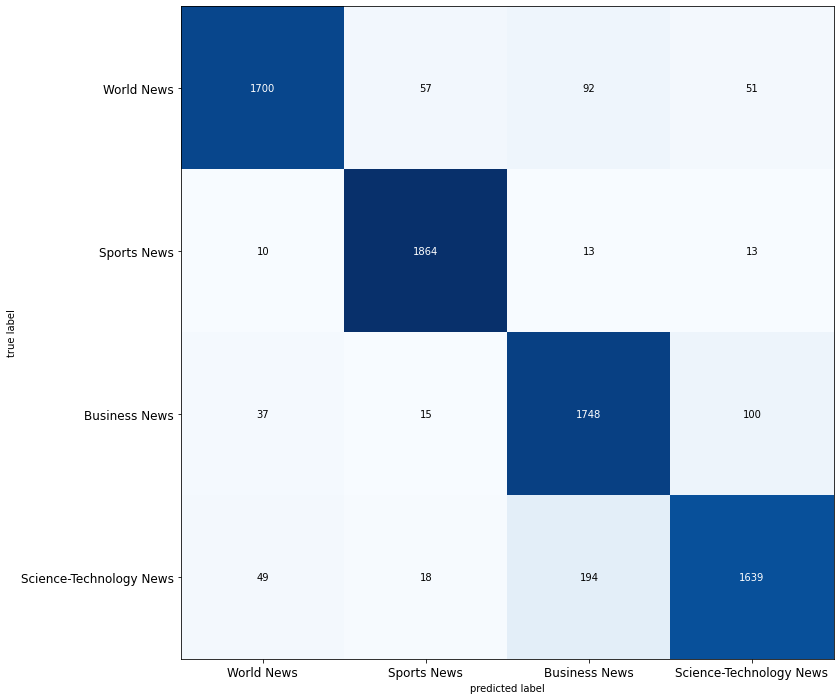

In [24]:
labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(X_test)]
cm  = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()

In [25]:
print("Recall of the model is {:.2f}".format(recall_score(y_test, preds, average='micro')*100))
print("Precision of the model is {:.2f}".format(precision_score(y_test, preds, average='micro')*100))
print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, preds)*100))

Recall of the model is 91.46
Precision of the model is 91.46
Accuracy of the model is 91.46


# Effects of cleaning the data

In [53]:
data = train_data.copy()
test = test_data.copy()
word_frequency = data.text.str.split(expand=True).stack().value_counts()
word_frequency.to_csv('raw_words.csv')
word_frequency.count()

188110

In [54]:
noise = ("'[/(){}\[\]\|@,;]#-.&:?$")

def clean(text):
  text = text.lower()
  text = ''.join((filter(lambda i: i not in noise, text)))
  return text

data['text'] = data['text'].apply(clean)
test['text'] = test['text'].apply(clean)

In [55]:
data['text'].head()

0    wall st bears claw back into the black reuters...
1    carlyle looks toward commercial aerospace reut...
2    oil and economy cloud stocks outlook reuters r...
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to alltime record posing new m...
Name: text, dtype: object

In [56]:
data["tag"] = "train"
test_data["tag"] = "test"
total_data = pd.concat([data, test_data])
total_data_0 = total_data[total_data.label == 0]
total_data_1 = total_data[total_data.label == 1]
total_data_2 = total_data[total_data.label == 2]
total_data_3 = total_data[total_data.label == 3]
total_data.shape

(127600, 3)

In [57]:
word_frequency_0 = total_data_0.text.str.split(expand=True).stack().value_counts()
word_frequency_0.to_csv('cleaned_words_0.csv')
word_frequency_1 = total_data_1.text.str.split(expand=True).stack().value_counts()
word_frequency_1.to_csv('cleaned_words_1.csv')
word_frequency_2 = total_data_2.text.str.split(expand=True).stack().value_counts()
word_frequency_2.to_csv('cleaned_words_2.csv')
word_frequency_3 = total_data_3.text.str.split(expand=True).stack().value_counts()
word_frequency_3.to_csv('cleaned_words_3.csv')

### Cleaning Try 1

In [106]:
words_to_remove_0 = word_frequency_0.index.to_list()[:15]
words_to_remove_1 = word_frequency_1.index.to_list()[:15]
words_to_remove_2 = word_frequency_2.index.to_list()[:15]
words_to_remove_3 = word_frequency_3.index.to_list()[:15]

In [107]:
def remove_stop_words(text,words_to_remove):
  text = ' '.join(word for word in text.split() if word not in words_to_remove) # remove stopwors from text
  return text

total_data_0['text'] = total_data_0.apply(lambda x: remove_stop_words(x['text'], words_to_remove_0), axis=1)
total_data_1['text'] = total_data_1.apply(lambda x: remove_stop_words(x['text'], words_to_remove_1), axis=1)
total_data_2['text'] = total_data_2.apply(lambda x: remove_stop_words(x['text'], words_to_remove_2), axis=1)
total_data_3['text'] = total_data_3.apply(lambda x: remove_stop_words(x['text'], words_to_remove_3), axis=1)

In [86]:
#word_frequency_test = total_data_0.text.str.split(expand=True).stack().value_counts()
#word_frequency_test.count()

48867

In [108]:
final_data = pd.concat([total_data_0, total_data_1, total_data_2, total_data_3])
final_data.shape

(127600, 3)

In [109]:
data = final_data[final_data.tag == 'train']
test = final_data[final_data.tag == 'test']

### Cleaning try 2

In [58]:
word_frequency_0 = pd.DataFrame({'word':word_frequency_0.index, 'count_0':word_frequency_0.values})
word_frequency_0['rank_0'] = word_frequency_0['count_0'].rank(ascending=False)
word_frequency_1 = pd.DataFrame({'word':word_frequency_1.index, 'count_1':word_frequency_1.values})
word_frequency_1['rank_1'] = word_frequency_1['count_1'].rank(ascending=False)
word_frequency_2 = pd.DataFrame({'word':word_frequency_2.index, 'count_2':word_frequency_2.values})
word_frequency_2['rank_2'] = word_frequency_2['count_2'].rank(ascending=False)
word_frequency_3 = pd.DataFrame({'word':word_frequency_3.index, 'count_3':word_frequency_3.values})
word_frequency_0['rank_3'] = word_frequency_3['count_3'].rank(ascending=False)

In [59]:
dfs = [word_frequency_0, word_frequency_1, word_frequency_2, word_frequency_3]
import functools as ft
df_final = word_frequency_0.merge(word_frequency_1,on='word', how = 'inner').merge(word_frequency_2,on='word', how = 'inner').merge(word_frequency_3,on='word', how = 'inner')

In [61]:
df_final["max_rank"] = df_final[['rank_0', 'rank_1', 'rank_2' , 'rank_3']].max(axis = 1)
df_final.head()

,word,count_0,rank_0,rank_3,count_1,rank_1,count_2,rank_2,count_3,max_rank
0,the,51218,1.0,1.0,66712,1.0,46829,1.0,49861,1.0
1,in,33863,2.0,2.0,25359,4.0,23421,5.0,18409,5.0
2,to,32790,3.0,3.0,29072,2.0,31624,2.0,32998,3.0
3,a,32034,4.0,4.0,27376,3.0,26538,3.0,27787,4.0
4,of,30541,5.0,5.0,21580,5.0,24055,4.0,27851,5.0


In [62]:
words_to_remove = list(df_final[df_final.max_rank <= 20.0]["word"])
words_to_remove

['the', 'in', 'to', 'a', 'of', 'and', 'on', 'for', 'that', '39s', 'as', 'with']

In [63]:
def remove_stop_words(text):
  text = ' '.join(word for word in text.split() if word not in words_to_remove) # remove stopwors from text
  return text

data['text'] = data['text'].apply(remove_stop_words)
test['text'] = test['text'].apply(remove_stop_words)
total_data['text'] = total_data['text'].apply(remove_stop_words)

In [111]:
X_train = data['text']
y_train = data['label']
X_test = test['text']
y_test = test['label']

In [112]:
#total_data = pd.concat([X_train, X_test])
X_training, X_val, y_training, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1, stratify=y_train)

In [66]:
#type(X_training)

In [113]:
vocab_size = 25000 # cover the 98% words
embed_size = 100 # arbitrarily chosen
maxlen = X_train.map(lambda x: len(x.split())).max()

# Create and Fit tokenizer
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(total_data.text.values)   ## Change the tokenizer data

# Tokenize data
X_training = tok.texts_to_sequences(X_training)
X_test = tok.texts_to_sequences(X_test)
X_val = tok.texts_to_sequences(X_val)

# Pad data
X_training = pad_sequences(X_training, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [114]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [115]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D()) #Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(Dense(1024))
model.add(Dropout(0.25)) #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.20))
model.add(Dense(4, activation='softmax')) #softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 140, 100)          2500000   
                                                                 
 bidirectional_14 (Bidirecti  (None, 140, 256)         234496    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 140, 128)         164352    
 onal)                                                           
                                                                 
 global_max_pooling1d_7 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_35 (Dense)            (None, 1024)              132096    
                                                      

In [116]:
callbacks = [
    EarlyStopping(     #EarlyStopping is used to stop at the epoch where val_accuracy does not improve significantly
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=4,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights_cleaned_data.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )]

In [117]:
#Compile and Fit Model

model.compile(loss='sparse_categorical_crossentropy', #Sparse Categorical Crossentropy Loss because data is not one-hot encoded
              optimizer='adam', 
              metrics=['accuracy']) 

model.fit(X_training, 
          y_training, 
          batch_size=32, 
          validation_data=(X_val, y_val), 
          epochs=20, 
          callbacks=callbacks)

Epoch 1/20
3187/3188 [============================>.] - ETA: 0s - loss: 0.3508 - accuracy: 0.8826
Epoch 1: val_accuracy improved from -inf to 0.91611, saving model to weights_cleaned_data.h5
3188/3188 [==============================] - 107s 32ms/step - loss: 0.3508 - accuracy: 0.8826 - val_loss: 0.2596 - val_accuracy: 0.9161
Epoch 2/20
3187/3188 [============================>.] - ETA: 0s - loss: 0.2107 - accuracy: 0.9326
Epoch 2: val_accuracy improved from 0.91611 to 0.91756, saving model to weights_cleaned_data.h5
3188/3188 [==============================] - 96s 30ms/step - loss: 0.2107 - accuracy: 0.9326 - val_loss: 0.2545 - val_accuracy: 0.9176
Epoch 3/20
3187/3188 [============================>.] - ETA: 0s - loss: 0.1491 - accuracy: 0.9518
Epoch 3: val_accuracy did not improve from 0.91756
3188/3188 [==============================] - 97s 31ms/step - loss: 0.1492 - accuracy: 0.9518 - val_loss: 0.2819 - val_accuracy: 0.9148
Epoch 4/20
3188/3188 [==============================] - ETA:

<Figure size 432x288 with 0 Axes>

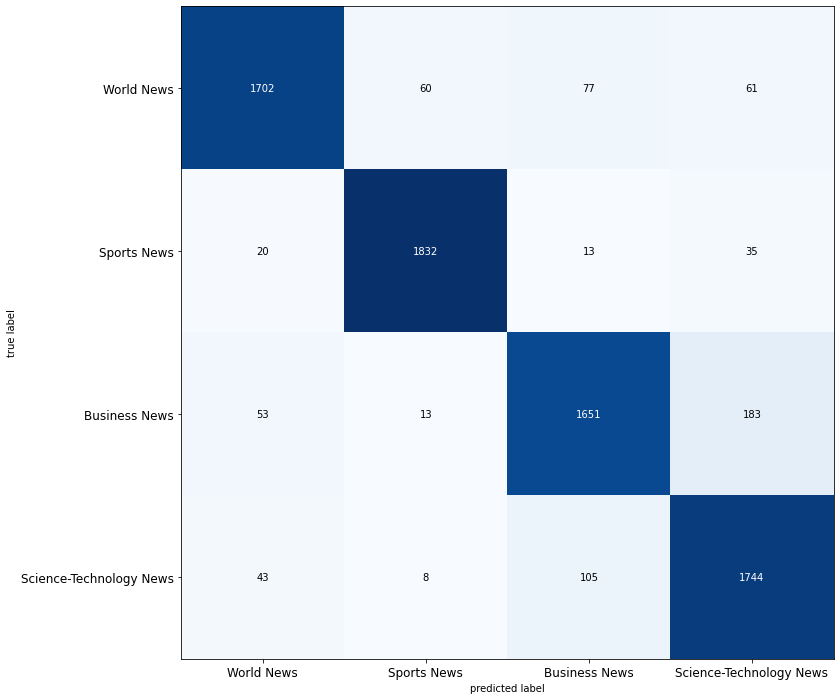

#############################################
Recall of the model is 91.17
Precision of the model is 91.17
Accuracy of the model is 91.17


In [118]:
model.load_weights('weights_cleaned_data.h5')
model.save('lstm_model_cleaned_data.hdf5')

labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(X_test)]
cm  = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()


print('#############################################')


print("Recall of the model is {:.2f}".format(recall_score(y_test, preds, average='micro')*100))
print("Precision of the model is {:.2f}".format(precision_score(y_test, preds, average='micro')*100))
print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, preds)*100))

In [73]:
def modelDemo2(news_text):
  news_text_org = news_text
  #News Labels
  labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
  news_text = map(clean, news_text)
  news_text = map(remove_stop_words, news_text)
  test_seq = pad_sequences(tok.texts_to_sequences(news_text), maxlen=maxlen)

  test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]
  
  for news, label in zip(news_text_org, test_preds):
      # print('{} - {}'.format(news, label))
      print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))

In [74]:
modelDemo2(['Corona Virus has brought a slowdown in the  world economy'])

Corona Virus has brought a slowdown in the  world economy - Business News


In [75]:
modelDemo2(['russia-ukraine war'])

russia-ukraine war - World News


# Trying Bayesian Optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
!pip install scikit-optimize
import skopt
from skopt.space import Real, Categorical, Integer
from skopt import gp_minimize, forest_minimize
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt.utils import use_named_args
print( "Tensorflow version: ", tf.__version__)
data = load_breast_cancer()
y = data.target.astype(float)
X = data.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=2)

     |████████████████████████████████| 100 kB 7.8 MB/s 
Tensorflow version:  2.8.0


In [ ]:
dim_optimization = Categorical(categories=['adam', 'SGD'],
name='optimization')
dim_learning_rate = Real(low=1e-5, high=1e-1, prior='log-uniform',
name='learning_rate')
dim_learning_decay = Real(low=0.09, high=0.999, prior='uniform',
name='learning_decay')
dim_num_layers = Integer(low=10, high=500, name='num_layers')
dim_num_dense_nodes = Integer(low=5, high=50, name='num_dense_nodes')
dim_dropout_prob = Real(low=0.1, high=0.99, prior='uniform',name='dropout_prob')
dim_activation = Categorical(categories=['sigmoid', 'softmax', 'relu'],name='activation')
dimensions = [
    dim_optimization, dim_learning_rate, dim_learning_decay,
    dim_num_layers, dim_num_dense_nodes, dim_dropout_prob, dim_activation
]

NUM_LAYERS = 1
BATCH_SIZE = 128
LEARNING_RATE = 0.0001
DECAY_STEPS = 1000
DENSE_UNITS = 20
DROPOUT_PROB = 0.5
ACTIVATION_FUNC = 'relu'
LOSS_FUNC = 'binary_crossentropy'
METRIC = 'accuracy'
LEARNING_DECAY = 0.9
OTIMIZATION_FUNC = 'adam'
ACQ_FUNC = 'EI' # Expected Improvement
best_score = 0
EPOCHS = 50
BATCH_SIZE = 256
N_CALLS = 1000
default_parameters = [OTIMIZATION_FUNC, LEARNING_RATE, LEARNING_DECAY, NUM_LAYERS, DENSE_UNITS, DROPOUT_PROB, ACTIVATION_FUNC]

In [ ]:
def create_model(optimization, learning_rate, learning_decay, num_layers, num_dense_nodes, dropout_prob, activation):
    model = Sequential()
    name = 'layer_{0}_dense_units'.format(0)
    model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
    for i in range(num_layers-1):
        name = 'layer_{0}_dense_units'.format(i+1) 
        model.add( Dense( num_dense_nodes, activation=activation, name=name))
        model.add( Dropout(dropout_prob))
    model.add( Dense(1, activation=activation))
    lr_schedule = ExponentialDecay( initial_learning_rate=learning_rate,
        decay_steps=DECAY_STEPS, decay_rate=learning_decay)
    
    if optimization == 'adam':
        optimizer = Adam(learning_rate=lr_schedule)
    if optimization == 'SGD':
        optimizer = SGD(learning_rate=lr_schedule)
    model.compile(
        optimizer=optimizer, loss=LOSS_FUNC, metrics=[METRIC])
    return model





    model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D()) #Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(Dense(1024))
model.add(Dropout(0.25)) #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Dropout(0.10))
model.add(Dense(4, activation='softmax')) #softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

In [ ]:
@use_named_args(dimensions=dimensions)
def fitness(optimization, learning_rate, learning_decay, num_layers, num_dense_nodes, dropout_prob, activation):
    # Create the neural network
    model = create_model( optimization=optimization,
        learning_rate=learning_rate, learning_decay=learning_decay,
        num_layers=num_layers, num_dense_nodes=num_dense_nodes,
        dropout_prob=dropout_prob, activation=activation)
    # Save log for tensorboard
    callback_log = TensorBoard(
        log_dir =
"./21_logs/opt_{0}_lr_{1:.0e}_lr_decay_{2:.0e}_layers_{3}_nodes_{4}_dropout_{5}_activation_{5}/".format(
        optimization, learning_rate, learning_decay, num_layers,         num_dense_nodes, dropout_prob, activation),
        histogram_freq=0, write_graph=True, write_grads=False, write_images=False)
    # Train the model.
    history = model.fit(
        x= X_train,y= y_train,
        epochs=EPOCHS,batch_size=BATCH_SIZE,
        validation_data=(X_validation, y_validation),
        callbacks=[callback_log],verbose=0)
    # Get the final model performance.
    col = [x for x in list(history.history.keys()) if 'val_'+METRIC in x]
    score = history.history[col[0]][-1]
    print("--> Validation {0}: {1:.2%}".format(METRIC, score))
    global best_score
    # Track scores and save best model
    if score > best_score:
        model.save('Optimal-NN')
    best_score = score
    # Clear model to save space
    del model
    K.clear_session()
    
    # Skopt minimizes black-box functions, return the negative
    return -score

In [ ]:
search_result = gp_minimize(func=fitness,
    dimensions=dimensions,
    acq_func=ACQ_FUNC,
    n_calls=N_CALLS,
    x0=default_parameters)


In [ ]:
plot_convergence(search_result)

In [ ]:
_ = plot_objective(result=search_result)

# Transformers implementation

### Distilbert

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_data = dataset.map(preprocess_function, batched=True)

  0%|          | 0/120 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
tf_train_set = tokenized_data["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = tokenized_data["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_data["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=4)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5))
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour, please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


Epoch 1/3
7500/7500 [==============================] - 1334s 177ms/step - loss: 0.2254 - val_loss: 0.1883
Epoch 2/3
7500/7500 [==============================] - 1336s 178ms/step - loss: 0.1418 - val_loss: 0.1756
Epoch 3/3
7500/7500 [==============================] - 1333s 178ms/step - loss: 0.1003 - val_loss: 0.1859


In [ ]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5))

model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour, please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


Epoch 1/3
7500/7500 [==============================] - 2540s 337ms/step - loss: 0.0735 - val_loss: 0.2023
Epoch 2/3
7500/7500 [==============================] - 2538s 338ms/step - loss: 0.0509 - val_loss: 0.2665
Epoch 3/3
7500/7500 [==============================] - 2543s 339ms/step - loss: 0.0393 - val_loss: 0.2912


In [ ]:
model.evaluate()

NameError: ignored

### BERT for the text classiication

In [ ]:
# run this cell, then restart the runtime before continuing
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from collections import defaultdict
from textwrap import wrap 
from pylab import rcParams 
import matplotlib.pyplot as plt 
from matplotlib import rc

from torch import nn, optim 
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
train_data = pd.DataFrame(dataset["train"])
test_data = pd.DataFrame(dataset['test'])

In [ ]:
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

In [ ]:
pre_trained_model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(pre_trained_model_name)

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
token_lens = []
for txt in train_data.text:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

Text(0.5, 0, 'Token COunt')

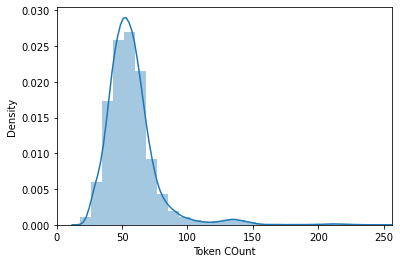

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256])
plt.xlabel('Token Count')

In [ ]:
max_len = 200

class AgNewsData(Dataset):
    
    def __init__(self, text, label, tokenizer, max_len):
        self.text = text
        self.label = label
        self.tokenizer = tokenizer
        self.max_len = max_len 
        
    def __len__(self):
        return len(self.text)
    
    def __getitem__(self, item):
        text = str(self.text[item])
        label = self.label[item]
        
        encoding = self.tokenizer.encode_plus(text, 
            max_length=self.max_len, 
            add_special_tokens=True,
            return_token_type_ids=False, 
            padding="max_length",
            truncation = True,
            return_attention_mask=True, 
            return_tensors='pt'
        )
        
        return {
            'content_text':text, 
            'input_ids':encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets':torch.tensor(target, dtype=torch.long)
        }

In [ ]:
RANDOM_SEED = 32
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=RANDOM_SEED)
train_data.shape, test_data.shape, val_data.shape

((108000, 2), (7600, 2), (12000, 2))

In [ ]:
train_data.head()

,text,label
98922,Electronic Passports Might Not Measure Up The ...,3
92163,Spady #39;s kin outraged The parents of a Colo...,1
60323,Sale considered for Northern Bank The owners o...,2
29366,Kerry Tries to Turn Campaign Against Bush WASH...,0
10874,10:16 am: Hungary #39;s designated prime minis...,0


In [ ]:
# helper function to create dataloaders 

def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = AgNewsData(
        text = df.text.to_numpy(),
        label = df['label'].to_numpy(),
        tokenizer = tokenizer, 
        max_len = max_len
        
    )
    
    
    return DataLoader(
        ds, 
        batch_size = batch_size, 
        num_workers = 4
    )

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(train_data, tokenizer, max_len, BATCH_SIZE)
val_data_loader = create_data_loader(val_data, tokenizer, max_len, BATCH_SIZE)
test_data_loader = create_data_loader(test_data, tokenizer, max_len, BATCH_SIZE)

In [ ]:
train_data_loader

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

NameError: ignored

In [ ]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

train_dataset, test_dataset = load_dataset('ag_news', split=['train', 'test'])
train_dataset = train_dataset.map(tokenize, batched=True, batch_size=len(train_dataset))
test_dataset = test_dataset.map(tokenize, batched=True, batch_size=len(train_dataset))
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

Downloading:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.49k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/11.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/751k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/178dbc194bf63ff577a0228067fcc8ce1cd6493502e44313f8c42b70c13d08aa. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    evaluate_during_training=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

TypeError: ignored

In [ ]:
trainer.train()